In [3]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 71.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.0.0-cp38-cp38-linux_x86_64.whl size=58397380 sha256=9e2cb8e3fd1b53c8dc7158544c3f3a2d8babac7858c88b791989dc090d599bac
  Stored in directory: /root/.cache/pip/wheels/92/af/46/7a021b32f4f0dec5d0a7b669e13b95a40a62ce007ac1039442
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6383483 sha256=1a6e799e7914281

In [4]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [5]:
import plotly.io as pio
pio.renderers.default='colab'

In [6]:
df = pd.read_csv("/content/MATIC-USD.csv")
df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,1.109111,1.148675,1.064824,1.104095,1.104095,7.494186e+08
std,0.508352,0.524332,0.485551,0.502231,0.502231,5.351317e+08
min,0.346595,0.383109,0.322821,0.346659,0.346659,1.002304e+08
25%,0.787551,0.807302,0.764604,0.787691,0.787691,3.904867e+08
50%,0.904373,0.935125,0.875325,0.903668,0.903668,5.877334e+08
75%,1.451579,1.505033,1.415517,1.448154,1.448154,9.052805e+08
max,2.876459,2.923235,2.712710,2.876757,2.876757,3.214825e+09


In [7]:
px.area(df, x="Date", y="Close")

In [8]:
px.line(df, x="Date", y="Volume")

In [9]:
px.area(df, x="Date", y="Volume")

In [10]:
px.bar(df, y="Volume")

In [11]:
px.box(df, y="Close")

In [12]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-26,2.639664,2.888085,2.617657,2.876757,2.876757,3214825308
1,2021-12-27,2.876459,2.923235,2.712710,2.725954,2.725954,1993085412
2,2021-12-28,2.727522,2.729910,2.455146,2.498206,2.498206,2817594927
3,2021-12-29,2.493963,2.615284,2.414051,2.470006,2.470006,2551425027
4,2021-12-30,2.476642,2.597184,2.419164,2.557751,2.557751,1935378928
...,...,...,...,...,...,...,...
361,2022-12-22,0.793081,0.796686,0.772891,0.795728,0.795728,200780671
362,2022-12-23,0.795727,0.806155,0.792303,0.798734,0.798734,166134842
363,2022-12-24,0.798763,0.800643,0.794642,0.795994,0.795994,100230352
364,2022-12-25,0.796003,0.798593,0.787552,0.795133,0.795133,118950074


In [13]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns = columns)

In [14]:
ndf

,Date,Close
0,2021-12-26,2.876757
1,2021-12-27,2.725954
2,2021-12-28,2.498206
3,2021-12-29,2.470006
4,2021-12-30,2.557751
...,...,...
361,2022-12-22,0.795728
362,2022-12-23,0.798734
363,2022-12-24,0.795994
364,2022-12-25,0.795133


In [15]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [16]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-26,2.342733,2.159080,2.545671,2.342733,2.342733,0.001134,0.001134,0.001134,0.001134,0.001134,0.001134,0.0,0.0,0.0,2.343867
1,2021-12-27,2.330184,2.120027,2.520614,2.330184,2.330184,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.0,0.0,0.0,2.330639
2,2021-12-28,2.317635,2.112131,2.501722,2.317635,2.317635,0.005509,0.005509,0.005509,0.005509,0.005509,0.005509,0.0,0.0,0.0,2.323144
3,2021-12-29,2.305086,2.106575,2.495257,2.305086,2.305086,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,0.0,0.0,0.0,2.305045
4,2021-12-30,2.292537,2.095107,2.499895,2.292537,2.292537,0.000794,0.000794,0.000794,0.000794,0.000794,0.000794,0.0,0.0,0.0,2.293332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2023-01-21,0.932168,0.741869,1.124857,0.901626,0.965854,-0.004606,-0.004606,-0.004606,-0.004606,-0.004606,-0.004606,0.0,0.0,0.0,0.927562
392,2023-01-22,0.932929,0.725106,1.133832,0.900683,0.968602,0.001134,0.001134,0.001134,0.001134,0.001134,0.001134,0.0,0.0,0.0,0.934063
393,2023-01-23,0.933690,0.737904,1.131554,0.899984,0.971461,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.0,0.0,0.0,0.934145
394,2023-01-24,0.934450,0.751240,1.147082,0.898922,0.973911,0.005509,0.005509,0.005509,0.005509,0.005509,0.005509,0.0,0.0,0.0,0.939960


In [19]:
px.line(forecast,x='ds',y='yhat')

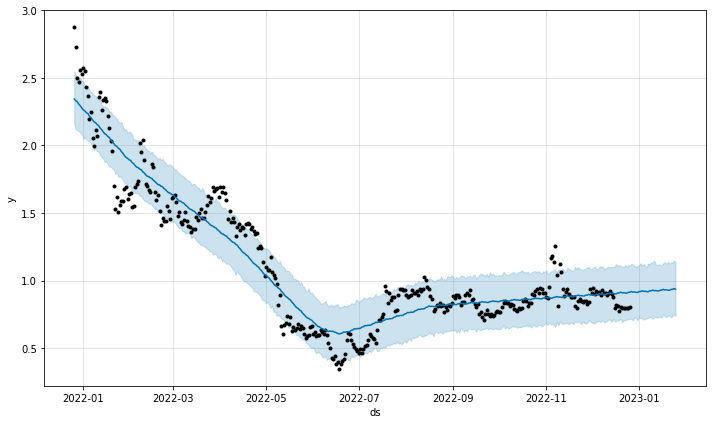

In [20]:
figure = m.plot(forecast, xlabel='ds', ylabel="y")

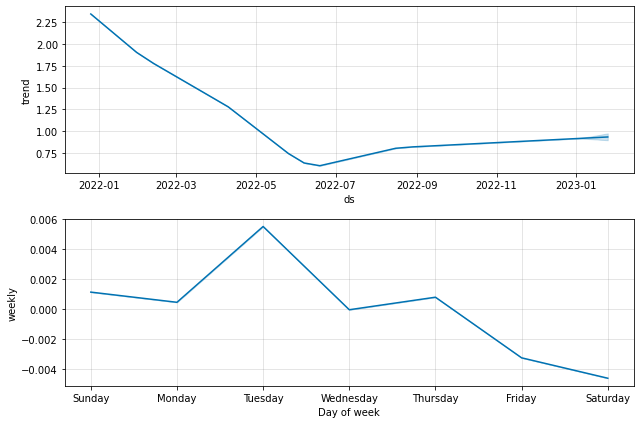

In [21]:
figure2 = m.plot_components(forecast)

In [22]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>